# **Processamento Dados ERA5**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from scipy.io import loadmat
import matplotlib.pyplot as plt
import datetime
import math
from datetime import datetime as dt
from datetime import timedelta

In [2]:
era5_1 = xr.open_dataset("download_1.nc")
era5_2 = xr.open_dataset("download_2.nc")

k_to_celsius = -273.15

In [52]:
#full_era5 = xr.concat([era5_1, era5_2], dim = 'time')
full_era5 = xr.open_dataset("download_full_era5_movar.nc")

In [56]:
full_era5.sst

<xarray.DataArray 'sst' (time: 5844, latitude: 13, longitude: 49)>
[3722628 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -41.0 -40.75 -40.5 ... -29.5 -29.25 -29.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -22.5 -22.75 -23.0
  * time       (time) datetime64[ns] 2004-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature

In [57]:
era5_1.sst

<xarray.DataArray 'sst' (time: 3638, expver: 2, latitude: 13, longitude: 49)>
[4634812 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -41.0 -40.75 -40.5 ... -29.5 -29.25 -29.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -22.5 -22.75 -23.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2004-04-01T12:00:00 ... 2021-12-31T12:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature

In [6]:
era5_2

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 13, time: 2571)
Coordinates:
  * longitude  (longitude) float32 -41.0 -40.75 -40.5 ... -29.5 -29.25 -29.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -22.5 -22.75 -23.0
  * time       (time) datetime64[ns] 2004-01-01T12:00:00 ... 2021-06-30T12:00:00
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-18 20:37:11 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [58]:
# Fast Plot 
sst = full_era5.sst
era5_sample = sst.isel(time=223)

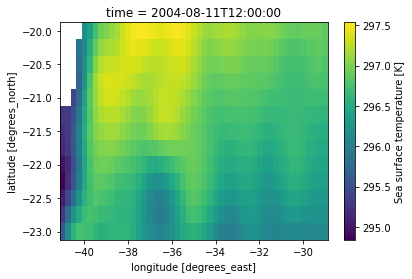

In [59]:
era5_sample.plot()

# Visualizando uma amostra ...

/home/ocf/POS_UFRJ/PYTHON_ENVS/ufrj_assignments/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/ocf/POS_UFRJ/PYTHON_ENVS/ufrj_assignments/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/ocf/POS_UFRJ/PYTHON_ENVS/ufrj_assignments/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

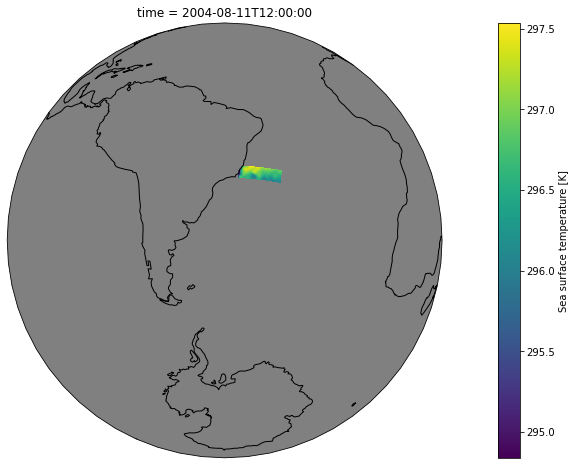

In [60]:
import cartopy.crs as ccrs
plt.figure(figsize=(20,8))
t = era5_sample.plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-45,-40), facecolor = "gray"),
    transform = ccrs.PlateCarree(),
)

t.axes.set_global()

t.axes.coastlines()



In [61]:
# Outra visualização....

lon, lat = np.meshgrid(np.linspace(-41,-29,49), np.linspace(-20,-23,13))

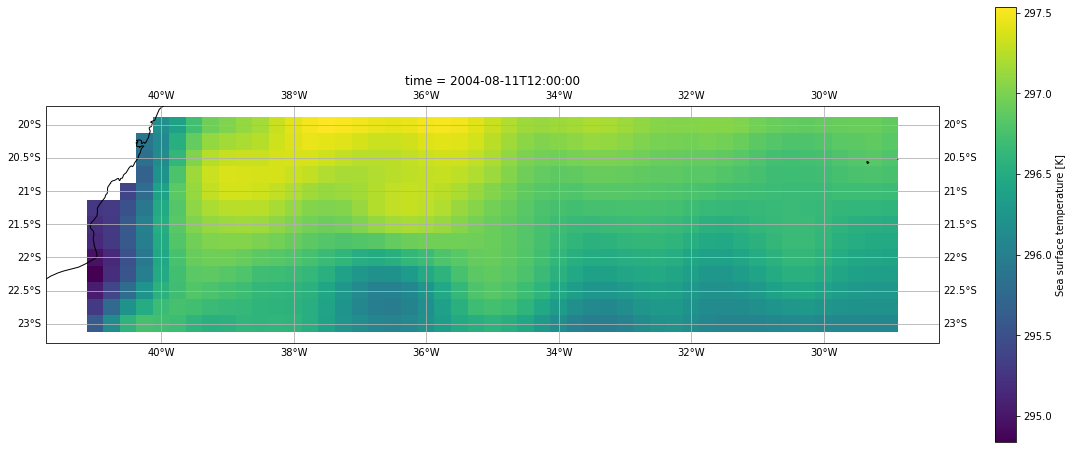

In [62]:
plt.figure(figsize=(20,8))
ax = plt.subplot(projection=ccrs.PlateCarree())

era5_sample.plot.pcolormesh("longitude","latitude", ax=ax)
#ax.scatter(lon, lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

In [63]:
era5_sample

<xarray.DataArray 'sst' (latitude: 13, longitude: 49)>
array([[      nan,       nan,       nan, ..., 296.92044, 296.9185 , 296.8775 ],
       [      nan,       nan,       nan, ..., 296.86087, 296.8795 , 296.83743],
       [      nan,       nan,       nan, ..., 296.81204, 296.83548, 296.79935],
       ...,
       [295.05228, 295.40292, 295.79834, ..., 296.28568, 296.2778 , 296.2828 ],
       [295.3013 , 295.76416, 296.21054, ..., 296.20462, 296.1948 , 296.19678],
       [295.6001 , 296.1295 , 296.58643, ..., 296.0971 , 296.10303, 296.09818]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -41.0 -40.75 -40.5 ... -29.5 -29.25 -29.0
  * latitude   (latitude) float32 -20.0 -20.25 -20.5 ... -22.5 -22.75 -23.0
    time       datetime64[ns] 2004-08-11T12:00:00
Attributes:
    units:      K
    long_name:  Sea surface temperature

# **MOVAR**

In [13]:
# Abrindo os dados
dados = loadmat('dataset/DadosMovar.mat')
dados.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SSH_movar', 'VEL_movar', 'None', 'latitude', 'longitude', 'profundidade', 'salinidade', 'temperatura', '__function_workspace__'])

In [14]:
lat = dados['latitude'].tolist()
lon = dados['longitude'].tolist()
tsm = dados['temperatura'][0]

In [15]:
# ds = xr.Dataset(data_vars = data_vars,
#                 coords = coords)

temp = [[row.flat[0] for row in line] for line in dados['temperatura'][0]]
station = 1
station_name = list()
while station <= 48:
    name = "E_" + str(station)
    station_name.append(name)
    station += 1
    
cruize = 1
cruize_name = list()
while cruize <= 77:
    name = "CRUIZE_" + str(cruize)
    cruize_name.append(name)
    cruize += 1
    

In [16]:
# Criando DataFrame:

tsm_movar_hist = pd.DataFrame(columns = station_name)

In [17]:
for station, hist_data in zip(station_name, tsm):
    tsm_movar_hist[station] = hist_data

In [18]:
tsm_movar_hist["CRUIZE"] = cruize_name
tsm_movar_hist.set_index('CRUIZE', inplace=True)

In [19]:
tsm_movar_hist

,E_1,E_2,E_3,E_4,E_5,E_6,E_7,E_8,E_9,E_10,...,E_39,E_40,E_41,E_42,E_43,E_44,E_45,E_46,E_47,E_48
CRUIZE,,,,,,,,,,,,,,,,,,,,,
CRUIZE_1,23.499226,23.756531,23.770879,23.747252,23.717516,23.730860,23.752800,23.638517,23.471465,23.248038,...,23.547429,23.810055,23.760576,23.613674,23.491007,23.449859,23.439000,23.467945,23.532576,23.581247
CRUIZE_2,26.896834,26.818156,26.733801,26.675473,26.649647,26.688782,26.848778,27.144192,27.240274,27.135807,...,27.395975,27.399053,27.437994,27.595545,27.766973,27.812037,27.715937,27.486350,27.205830,27.104429
CRUIZE_3,24.060687,24.041373,24.038529,24.067926,24.093573,24.073169,23.947617,23.855217,23.850083,23.843946,...,23.295734,23.336801,23.329103,23.278467,23.373334,23.627349,23.821648,23.798427,23.654654,23.583798
CRUIZE_4,27.920818,27.387925,27.049383,26.888952,26.854583,26.896871,26.833469,26.915357,27.306002,27.708478,...,27.918611,27.818803,27.714721,27.703243,27.753873,27.771777,27.751768,27.713510,27.673000,27.604952
CRUIZE_5,23.489762,23.477425,23.476364,23.502066,23.565956,23.735893,23.986648,24.177905,24.246228,24.184116,...,24.407720,24.395638,24.220213,24.083416,24.089854,24.157630,24.124323,24.044972,23.878790,23.816418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRUIZE_73,27.970725,28.101742,28.166455,28.070844,27.841630,27.426962,27.149527,27.187947,27.412331,27.741340,...,28.396850,28.492883,28.648761,28.826165,28.867447,28.778074,28.646931,28.657936,28.746724,28.761636
CRUIZE_74,25.952224,25.863486,25.840418,25.828224,25.829098,25.828189,25.619914,25.254589,25.084594,25.310170,...,26.243863,26.286676,26.067433,25.730990,25.518824,25.519546,25.647269,25.827318,25.951070,25.912387
CRUIZE_75,24.035221,24.088006,24.188302,24.247570,24.258114,24.206855,24.178079,24.209145,24.227793,24.260977,...,23.839929,23.888201,24.020703,24.078783,23.975659,23.845363,23.753467,23.749874,23.777295,23.802165


In [20]:
dates = loadmat("dataset/datas.mat")

In [21]:
date_movar = dates['date']

In [22]:
def datenum_to_datetime(datenum):
    
    date_time = dt.fromordinal(int(datenum)) + timedelta(days=datenum%1) - timedelta(days = 366)
    
    return date_time

In [23]:
new_dates = [] 
for pair in date_movar:

    dates = [datenum_to_datetime(x).strftime(format="%Y-%m-%d") for x in pair]
    new_dates.append(dates)

In [24]:
new_dates

[['2004-08-29', '2004-09-02'],
 ['2005-02-17', '2005-02-26'],
 ['2005-08-12', '2005-08-22'],
 ['2006-02-14', '2006-02-21'],
 ['2006-06-30', '2006-07-02'],
 ['2006-08-16', '2006-08-18'],
 ['2006-12-11', '2006-12-14'],
 ['2007-02-25', '2007-02-28'],
 ['2007-03-05', '2007-03-07'],
 ['2007-04-21', '2007-04-24'],
 ['2007-06-27', '2007-06-29'],
 ['2007-08-24', '2007-08-27'],
 ['2008-02-15', '2008-02-16'],
 ['2008-04-17', '2008-04-19'],
 ['2008-06-11', '2008-06-13'],
 ['2008-08-19', '2008-08-21'],
 ['2008-12-06', '2008-12-08'],
 ['2009-02-03', '2009-02-05'],
 ['2009-04-10', '2009-04-13'],
 ['2009-06-21', '2009-06-23'],
 ['2009-08-19', '2009-08-21'],
 ['2009-10-14', '2009-10-16'],
 ['2009-12-09', '2009-12-11'],
 ['2010-05-04', '2010-05-08'],
 ['2010-12-02', '2010-12-05'],
 ['2011-02-08', '2011-02-10'],
 ['2011-05-03', '2011-05-06'],
 ['2011-06-12', '2011-06-15'],
 ['2011-08-13', '2011-08-23'],
 ['2011-10-18', '2011-10-21'],
 ['2011-11-30', '2011-12-02'],
 ['2012-02-23', '2012-02-27'],
 ['2012-

# **Coletando dados de TSM no ERA5 nas mesmas lat/lon do MOVAR**

In [64]:
import itertools

latitude = list(itertools.chain(*lat))
longitude = list(itertools.chain(*lon))

In [65]:
stations_lon = xr.DataArray(longitude, dims="points")
stations_lat = xr.DataArray(latitude, dims="points")

In [66]:
sst = full_era5.sst

In [67]:
station_era5 = sst.sel(longitude=stations_lon, latitude=stations_lat, method="nearest")

In [68]:
cruize = station_era5.sel(time="2019-02-14")

In [49]:
# Criando DataFrame com todos os pontas estações para todos os cruzeiros

In [84]:
era5_sst_movar = pd.DataFrame(columns = station_name)

for CRUIZE in range(len(cruize_name)):
    
    cruize_number = cruize_name[CRUIZE]
    date_cruize = new_dates[CRUIZE][0]
    
    cruize_data_era5 = sst.sel(time=date_cruize)
    
    if cruize_data_era5.values.size == 0:
        sst_era5 = [np.nan] * 48
    
    else:
        sst_era5 = ((cruize_data_era5.values + k_to_celsius)[0][0].tolist())[0:-1]
    
    era5_sst_movar = era5_sst_movar.append(pd.DataFrame([sst_era5], columns = station_name))
    
    
    

,E_1,E_2,E_3,E_4,E_5,E_6,E_7,E_8,E_9,E_10,...,E_39,E_40,E_41,E_42,E_43,E_44,E_45,E_46,E_47,E_48
0,NaN,NaN,NaN,NaN,23.638611,23.712860,23.879791,23.996063,24.051697,24.143494,...,23.840759,23.817322,23.791931,23.779236,23.756683,23.745056,23.737183,23.724487,23.716766,23.712860
0,NaN,NaN,NaN,NaN,26.239258,26.447174,26.849518,27.129883,27.234344,27.332947,...,27.719574,27.735321,27.744080,27.742126,27.743011,27.728516,27.710815,27.692352,27.671814,27.663940
0,NaN,NaN,NaN,NaN,23.453064,23.669891,23.951141,24.094666,24.082855,24.109314,...,23.862244,23.878876,23.844696,23.780121,23.742188,23.718750,23.720551,23.717682,23.683502,23.641479
0,NaN,NaN,NaN,NaN,26.719635,27.110199,27.675720,27.962891,28.026245,28.040009,...,27.801697,27.775391,27.754822,27.724579,27.670898,27.624023,27.576080,27.551727,27.527252,27.523315
0,NaN,NaN,NaN,NaN,24.284882,24.451813,24.757538,24.951843,24.952759,24.984955,...,24.597260,24.535889,24.479187,24.418701,24.346405,24.279877,24.244812,24.219391,24.186127,24.166626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,27.501099,27.730621,27.968933,28.136932,28.094879,28.156433,...,28.601746,28.644684,28.780457,28.759003,28.651489,28.578308,28.520691,28.416199,28.428894,28.476685
0,NaN,NaN,NaN,NaN,25.303558,25.679626,26.080933,26.296844,26.310455,26.302612,...,26.111328,26.013641,25.860321,25.902191,25.974487,25.970703,25.954987,25.948181,25.952087,25.993073
0,NaN,NaN,NaN,NaN,23.598083,24.043396,24.464203,24.598022,24.568848,24.619507,...,24.168427,24.170410,24.097076,24.084381,24.090271,24.046265,24.004364,23.952515,23.919403,23.955536
0,NaN,NaN,NaN,NaN,24.732605,24.910278,24.933716,24.881989,24.878052,24.903473,...,24.111420,24.068481,24.144714,24.114471,24.055786,23.979736,23.960083,23.971863,23.993347,24.013916


In [87]:
era5_sst_movar["CRUIZE"] = cruize_name
era5_sst_movar.set_index('CRUIZE', inplace=True)

In [88]:
era5_sst_movar

,E_1,E_2,E_3,E_4,E_5,E_6,E_7,E_8,E_9,E_10,...,E_39,E_40,E_41,E_42,E_43,E_44,E_45,E_46,E_47,E_48
CRUIZE,,,,,,,,,,,,,,,,,,,,,
CRUIZE_1,NaN,NaN,NaN,NaN,23.638611,23.712860,23.879791,23.996063,24.051697,24.143494,...,23.840759,23.817322,23.791931,23.779236,23.756683,23.745056,23.737183,23.724487,23.716766,23.712860
CRUIZE_2,NaN,NaN,NaN,NaN,26.239258,26.447174,26.849518,27.129883,27.234344,27.332947,...,27.719574,27.735321,27.744080,27.742126,27.743011,27.728516,27.710815,27.692352,27.671814,27.663940
CRUIZE_3,NaN,NaN,NaN,NaN,23.453064,23.669891,23.951141,24.094666,24.082855,24.109314,...,23.862244,23.878876,23.844696,23.780121,23.742188,23.718750,23.720551,23.717682,23.683502,23.641479
CRUIZE_4,NaN,NaN,NaN,NaN,26.719635,27.110199,27.675720,27.962891,28.026245,28.040009,...,27.801697,27.775391,27.754822,27.724579,27.670898,27.624023,27.576080,27.551727,27.527252,27.523315
CRUIZE_5,NaN,NaN,NaN,NaN,24.284882,24.451813,24.757538,24.951843,24.952759,24.984955,...,24.597260,24.535889,24.479187,24.418701,24.346405,24.279877,24.244812,24.219391,24.186127,24.166626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRUIZE_73,NaN,NaN,NaN,NaN,27.501099,27.730621,27.968933,28.136932,28.094879,28.156433,...,28.601746,28.644684,28.780457,28.759003,28.651489,28.578308,28.520691,28.416199,28.428894,28.476685
CRUIZE_74,NaN,NaN,NaN,NaN,25.303558,25.679626,26.080933,26.296844,26.310455,26.302612,...,26.111328,26.013641,25.860321,25.902191,25.974487,25.970703,25.954987,25.948181,25.952087,25.993073
CRUIZE_75,NaN,NaN,NaN,NaN,23.598083,24.043396,24.464203,24.598022,24.568848,24.619507,...,24.168427,24.170410,24.097076,24.084381,24.090271,24.046265,24.004364,23.952515,23.919403,23.955536


### PLOTS

In [89]:
# Configurando alguns padroes para as figuras
figsize_plots = (20,6)
fontsize_legend = 18
fontsize_title = 20
fontsize_ticks = 18
fontsize_label = 18

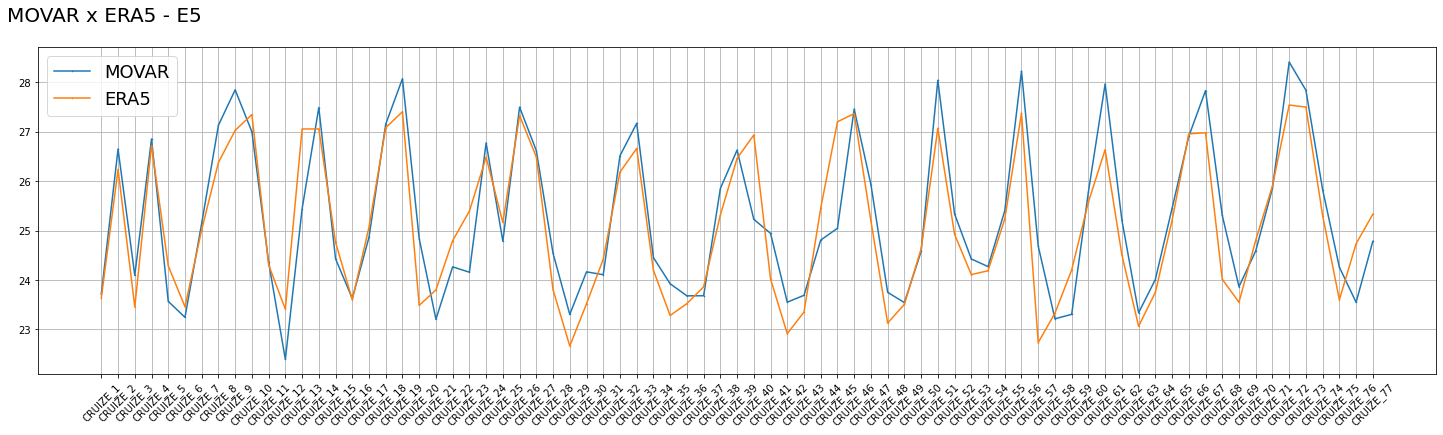

In [90]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("MOVAR x ERA5 - E5", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = fontsize_title)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
#hora = mdates.HourLocator(interval = 24)

ax.plot(tsm_movar_hist['E_5'].astype(float), marker="*", markersize = 1, label = "MOVAR")
ax.plot(era5_sst_movar['E_5'].astype(float), marker="*", markersize = 1, label = "ERA5")
ax.tick_params('x', labelrotation=45)
#ax.set_ylabel('Magnitude (mm/s)', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
#ax.xaxis.set_major_locator(hora)
#ax.set_yticks(np.arange(0.0, 1201, 200.0))
#ax.set_title('04/11/2018')
#ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize = fontsize_legend)
ax.grid()
    
fig.tight_layout()
#plt.savefig('images/movar_era5.png', dpi = 300)

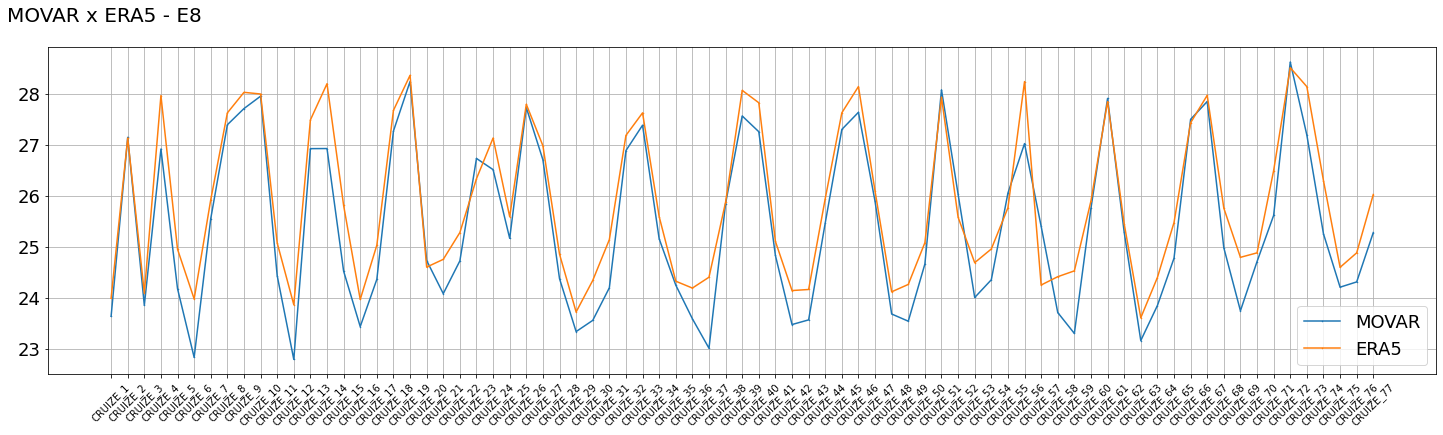

In [190]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("MOVAR x ERA5 - E8", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = fontsize_title)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
#hora = mdates.HourLocator(interval = 24)

ax.plot(tsm_movar_hist['E_8'].astype(float), marker="*", markersize = 1, label = "MOVAR")
ax.plot(era5_sst_movar['E_8'].astype(float), marker="*", markersize = 1, label = "ERA5")
ax.tick_params('x', labelrotation=45)
ax.tick_params('y', labelsize=fontsize_ticks)
#ax.set_ylabel('Magnitude (mm/s)', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
#ax.xaxis.set_major_locator(hora)
#ax.set_yticks(np.arange(0.0, 1201, 200.0))
#ax.set_title('04/11/2018')
#ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize = fontsize_legend)
ax.grid()
    
fig.tight_layout()

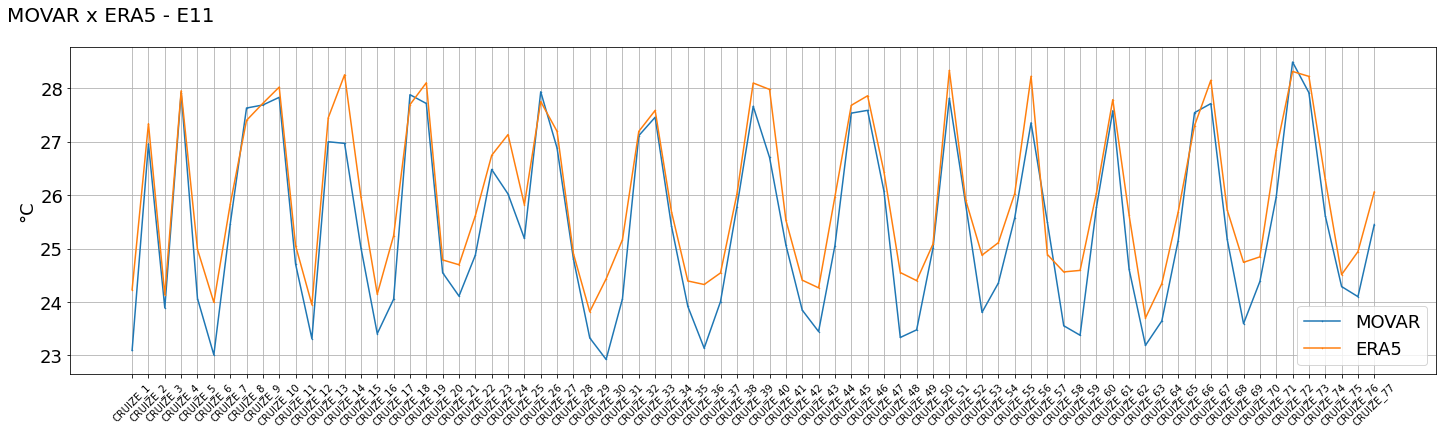

In [187]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("MOVAR x ERA5 - E11", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = fontsize_title)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
#hora = mdates.HourLocator(interval = 24)

ax.plot(tsm_movar_hist['E_11'].astype(float), marker="*", markersize = 1, label = "MOVAR")
ax.plot(era5_sst_movar['E_11'].astype(float), marker="*", markersize = 1, label = "ERA5")
ax.tick_params('x', labelrotation=45)
ax.tick_params('y', labelsize=fontsize_ticks)
ax.set_ylabel('°C', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
#ax.xaxis.set_major_locator(hora)
#ax.set_yticks(np.arange(0.0, 1201, 200.0))
#ax.set_title('04/11/2018')
#ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize = fontsize_legend)
ax.grid()
    
fig.tight_layout()

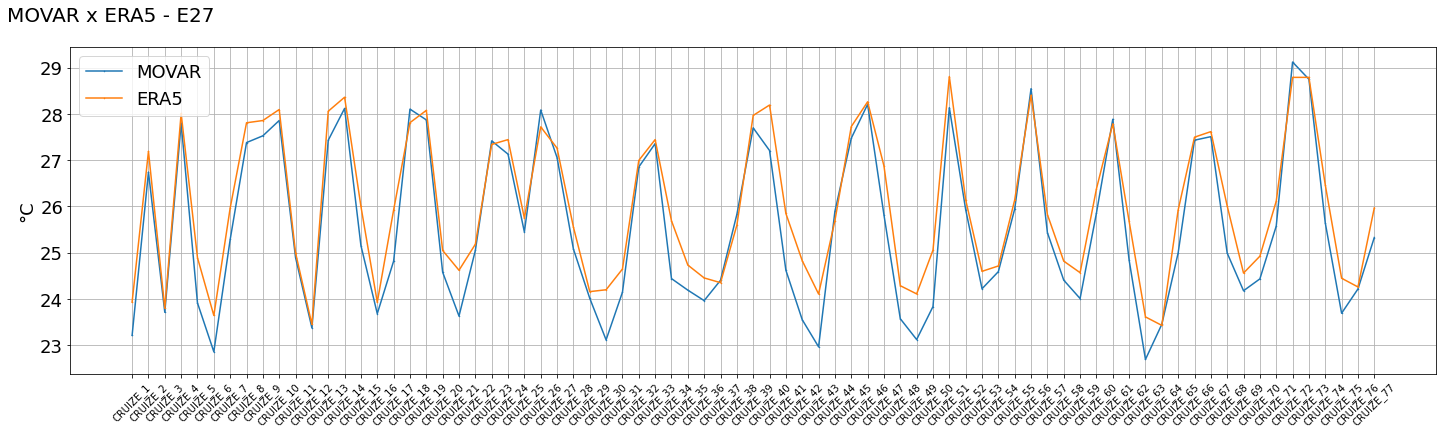

In [189]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("MOVAR x ERA5 - E27", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = fontsize_title)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
#hora = mdates.HourLocator(interval = 24)

ax.plot(tsm_movar_hist['E_27'].astype(float), marker="*", markersize = 1, label = "MOVAR")
ax.plot(era5_sst_movar['E_27'].astype(float), marker="*", markersize = 1, label = "ERA5")
ax.tick_params('x', labelrotation=45)
ax.tick_params('y', labelsize=fontsize_ticks)
ax.set_ylabel('°C', fontsize = fontsize_label)
#ax.set_ylabel('Magnitude (mm/s)', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
#ax.xaxis.set_major_locator(hora)
#ax.set_yticks(np.arange(0.0, 1201, 200.0))
#ax.set_title('04/11/2018')
#ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize = fontsize_legend)
ax.grid()
    
fig.tight_layout()

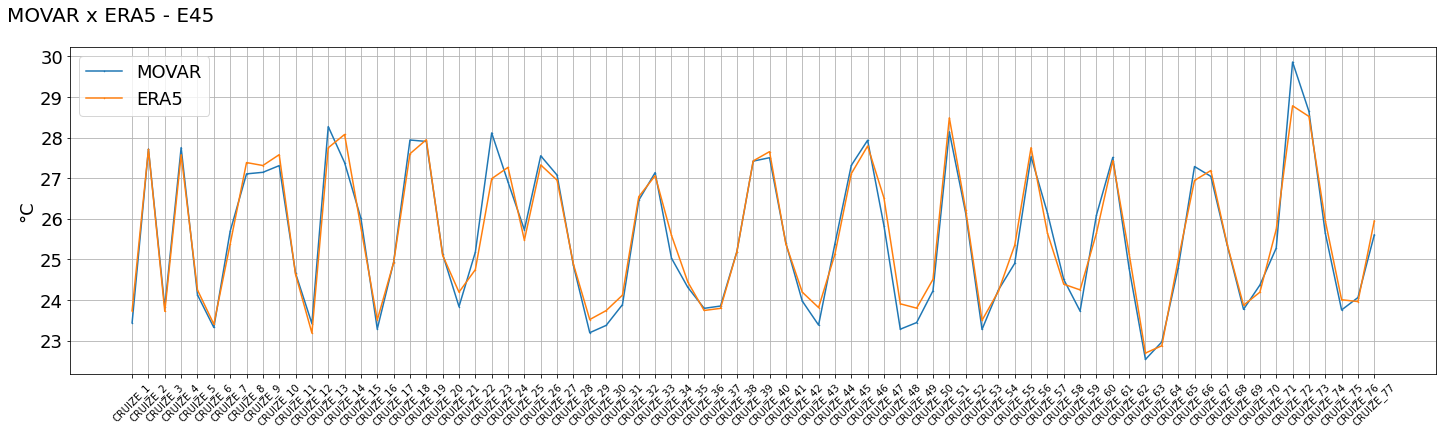

In [188]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("MOVAR x ERA5 - E45", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = fontsize_title)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
#hora = mdates.HourLocator(interval = 24)

ax.plot(tsm_movar_hist['E_45'].astype(float), marker="*", markersize = 1, label = "MOVAR")
ax.plot(era5_sst_movar['E_45'].astype(float), marker="*", markersize = 1, label = "ERA5")
ax.tick_params('x', labelrotation=45)
ax.tick_params('y', labelsize=fontsize_ticks)
ax.set_ylabel('°C', fontsize = fontsize_label)
#ax.set_ylabel('Magnitude (mm/s)', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
#ax.xaxis.set_major_locator(hora)
#ax.set_yticks(np.arange(0.0, 1201, 200.0))
#ax.set_title('04/11/2018')
#ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize = fontsize_legend)
ax.grid()
    
fig.tight_layout()

### PLOT por Cruzeiro

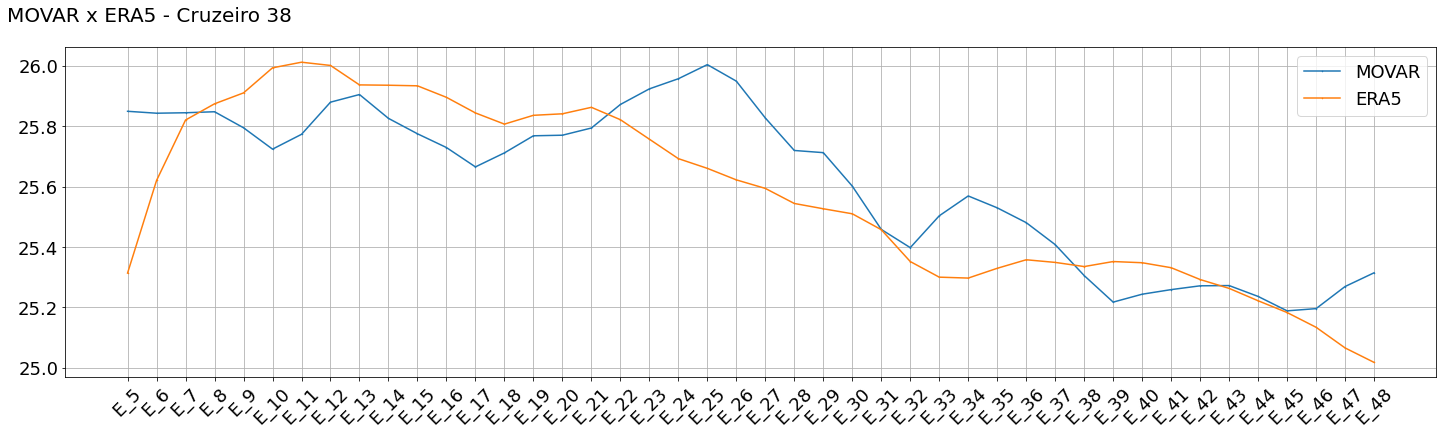

In [182]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("MOVAR x ERA5 - Cruzeiro 38", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = fontsize_title)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
#hora = mdates.HourLocator(interval = 24)

ax.plot(tsm_movar_hist.loc["CRUIZE_38"].astype(float), marker="*", markersize = 1, label = "MOVAR")
ax.plot(era5_sst_movar.loc["CRUIZE_38"].astype(float), marker="*", markersize = 1, label = "ERA5")
ax.tick_params('x', labelrotation=45)
#ax.set_ylabel('Magnitude (mm/s)', fontsize = fontsize_label)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
#ax.xaxis.set_major_locator(hora)
#ax.set_yticks(np.arange(0.0, 1201, 200.0))
#ax.set_title('04/11/2018')
ax.tick_params(labelsize=fontsize_ticks)
ax.legend(fontsize = fontsize_legend)
ax.grid()
    
fig.tight_layout()

### CORRELAÇÕES

['E_5',
 'E_6',
 'E_7',
 'E_8',
 'E_9',
 'E_10',
 'E_11',
 'E_12',
 'E_13',
 'E_14',
 'E_15',
 'E_16',
 'E_17',
 'E_18',
 'E_19',
 'E_20',
 'E_21',
 'E_22',
 'E_23',
 'E_24',
 'E_25',
 'E_26',
 'E_27',
 'E_28',
 'E_29',
 'E_30',
 'E_31',
 'E_32',
 'E_33',
 'E_34',
 'E_35',
 'E_36',
 'E_37',
 'E_38',
 'E_39',
 'E_40',
 'E_41',
 'E_42',
 'E_43',
 'E_44',
 'E_45',
 'E_46',
 'E_47',
 'E_48']

In [102]:
from scipy.stats import pearsonr

In [105]:
# removendo as estações costeiras

nan_stations = ['E_1', 'E_2','E_3', 'E_4']

tsm_movar_hist.drop(columns = nan_stations, inplace=True)
era5_sst_movar.drop(columns = nan_stations, inplace=True)

In [180]:
def rmse(manual, automatic):
    N = len(manual)
    diff_obs_square = sum((manual - automatic)**2)/N
    diff_roots = math.sqrt(diff_obs_square)
    
    return diff_roots


cols_stats = ['MEAN_MOVAR', 'MEAN_ERA5', 'STD_MOVAR', 'STD_ERA5', 'R','RMSE']

stats_df_by_cruize = pd.DataFrame({}, columns = cols_stats, index=cruize_name)

for CRUIZE in cruize_name:
    
    sst_movar_cruize = tsm_movar_hist.loc[CRUIZE]
    sst_era5_cruize = era5_sst_movar.loc[CRUIZE]
    
    
    stats_df_by_cruize.loc[CRUIZE]['MEAN_MOVAR']= sst_movar_cruize.mean()
    stats_df_by_cruize.loc[CRUIZE]['MEAN_ERA5'] = sst_era5_cruize.mean()
    
    stats_df_by_cruize.loc[CRUIZE]['STD_MOVAR'] = sst_movar_cruize.std()
    stats_df_by_cruize.loc[CRUIZE]['STD_ERA5'] = sst_era5_cruize.std()
    
    R_cruize, _ = pearsonr(sst_movar_cruize,  sst_era5_cruize)
    RMSE_cruize = rmse(sst_movar_cruize,  sst_era5_cruize)
    
    stats_df_by_cruize.loc[CRUIZE]['R'] = R_cruize.astype(float)
    stats_df_by_cruize.loc[CRUIZE]['RMSE'] = RMSE_cruize    


In [306]:
cols_stats = ['MEAN_MOVAR', 'MEAN_ERA5', 'STD_MOVAR', 'STD_ERA5', 'R','RMSE']

stats_df_by_station = pd.DataFrame({}, columns = cols_stats, index=station_name[4:])

T_tsm_movar = tsm_movar_hist.T
T_tsm_era5 = era5_sst_movar.T

movar_all_stations = pd.DataFrame(columns = ['sst'])
era5_all_stations = pd.DataFrame(columns = ['sst'])


for CRUIZE in station_name[4:]:
    
    sst_movar_station = T_tsm_movar.loc[CRUIZE]
    sst_era5_station = T_tsm_era5.loc[CRUIZE]
    
    
    stats_df_by_station.loc[CRUIZE]['MEAN_MOVAR']= sst_movar_station.mean()
    stats_df_by_station.loc[CRUIZE]['MEAN_ERA5'] = sst_era5_station.mean()
    
    stats_df_by_station.loc[CRUIZE]['STD_MOVAR'] = sst_movar_station.std()
    stats_df_by_station.loc[CRUIZE]['STD_ERA5'] = sst_era5_station.std()
    
    R_station, _ = pearsonr(sst_movar_station,  sst_era5_station)
    RMSE_station = rmse(sst_movar_station,  sst_era5_station)
    
    stats_df_by_station.loc[CRUIZE]['R'] = R_station.astype(float)
    stats_df_by_station.loc[CRUIZE]['RMSE'] = RMSE_station    
    
    movar_all_stations = movar_all_stations.append(pd.DataFrame(data=sst_movar_station.values.tolist(), columns = ['sst']))
    era5_all_stations = era5_all_stations.append(pd.DataFrame(data=sst_era5_station.values.tolist(), columns = ['sst']))

In [308]:
stats_df_by_station = stats_df_by_station.astype(float)
movar_all_stations.reset_index(drop=True, inplace=True)
era5_all_stations.reset_index(drop=True, inplace=True)

In [319]:
def get_coeff(movar, era5):
    x_mean = movar.mean()
    y_mean = era5.mean()
    
    diff_x = movar - x_mean
    diff_y = era5 - y_mean
    
    a = sum((diff_x*diff_y))/sum((diff_x) ** 2)
    
    b = y_mean - a*x_mean
    
    return a, b

In [320]:
a, b = get_coeff(movar_all_stations.sst, era5_all_stations.sst)

In [339]:
a,b

(0.8772839508601528, 3.507435767160807)

In [336]:
R_stations, RMSE_stations

(0.9568696288402812, 0.6271066756188782)

In [334]:
from matplotlib.offsetbox import AnchoredText

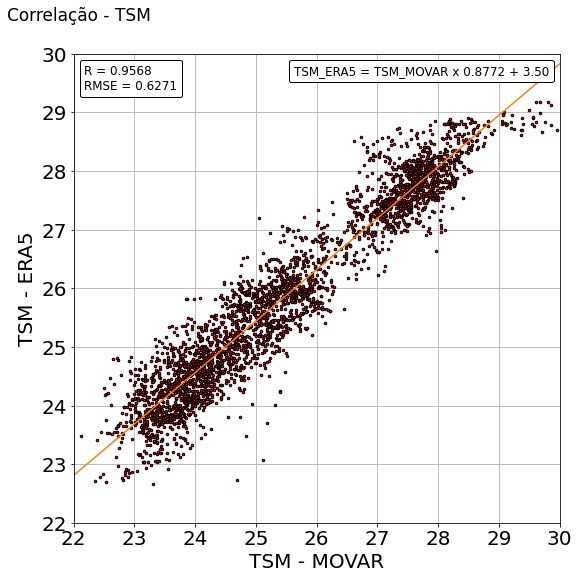

In [349]:
# Regression Plot Day 1 
lims = [22, 30]

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Correlação - TSM", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = 15 + 2)
ax.plot(movar_all_stations['sst'], era5_all_stations['sst'], marker=".", linestyle = 'None', markersize=5, markeredgecolor = "black", markerfacecolor='red')
ax.plot(np.array([22,30]), np.array([22,30]) * a + b)
ax.set_xlabel("TSM - MOVAR", fontsize = fontsize_label + 2)
ax.set_ylabel("TSM - ERA5", fontsize = fontsize_label + 2)
ax.set_xlim(lims)
ax.set_ylim(lims)

at = AnchoredText(
    "R = 0.9568\n\
RMSE = 0.6271", prop=dict(size=12), frameon=True, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at2 = AnchoredText(
    "TSM_ERA5 = TSM_MOVAR x 0.8772 + 3.50", prop=dict(size=12), frameon=True, loc='upper right')
at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at2)


# TSM_era5 = TSM_movar x 0.8772 + 3.50

#ax.plot()
#ax.tick_params('x', labelrotation=45)
#ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.tick_params(labelsize=fontsize_ticks + 2)
ax.grid()
fig.tight_layout()


array([4, 6, 2])

In [324]:
R_stations, _ = pearsonr(movar_all_stations['sst'],  era5_all_stations['sst'])
RMSE_stations = rmse(movar_all_stations['sst'],  era5_all_stations['sst'])

R_stations, RMSE_stations

(0.9568696288402812, 0.6271066756188782)

(            sst
 0     23.717516
 1     26.649647
 2     24.093573
 3     26.854583
 4     23.565956
 ...         ...
 3383  28.761636
 3384  25.912387
 3385  23.802165
 3386  23.970898
 3387  25.926042
 
 [3388 rows x 1 columns],
             sst
 0     24.245210
 1     26.526716
 2     24.082432
 3     26.948143
 4     24.812173
 ...         ...
 3383  28.489574
 3384  26.310741
 3385  24.523243
 3386  24.574459
 3387  26.350418
 
 [3388 rows x 1 columns])

<AxesSubplot:>

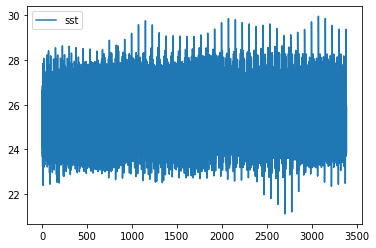

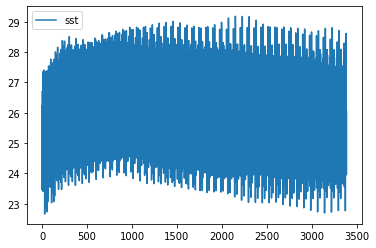

In [186]:
pearsonr(tsm_movar_hist['E_45'],  era5_sst_movar['E_45'])

(0.9824666639836428, 1.822145124686316e-56)

### ARANI 

Dias 14,15 e 16 de Março 2011

In [38]:
#sst = full_era5.sst
#era5_sample = sst.isel(time=223, expver=0)

arani_14 = sst.sel(time="2011-03-14")
arani_15 = sst.sel(time="2011-03-15")
arani_16 = sst.sel(time="2011-03-16")


#

In [39]:
teste = full_era5.sortby(variables="time")

In [40]:
#arani_period = teste.sel(time=slice("2011-02-01", "2011-04-01"))

arani_14 = arani_period.sel(time="2011-03-14")
arani_15 = arani_period.sel(time="2011-03-15")
arani_16 = arani_period.sel(time="2011-03-16")

NameError: name 'arani_period' is not defined

AttributeError: '_Dataset_PlotMethods' object has no attribute 'pcolormesh'

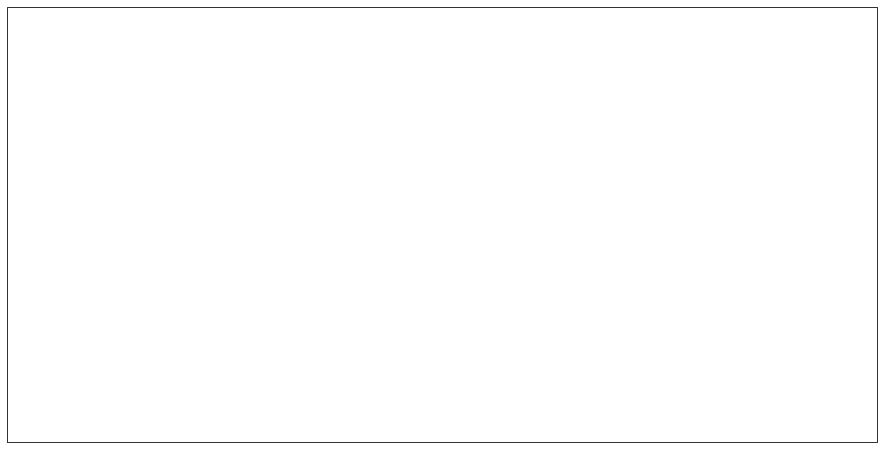

In [356]:


plt.figure(figsize=(20,8))
ax = plt.subplot(projection=ccrs.PlateCarree())

arani_14.plot.pcolormesh("longitude","latitude", ax=ax)
#ax.scatter(lon, lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

### meets google 

Ivan6:50 PM
VARIÁVEIS FÍSICAS ANALISADAS NOS 3 EVENTOS DOS 3 CICLONES SUBTROPICAIS:
Divergência do vento e Linhas de Corrente em 850 hpa
Espessura da Camada 500/1000 hpa e vento em 1000 hpa
Altura Geopotencial e Divergência de Umidade em 850 hpa
Linhas de Corrente e Altura Geopotencial em 200 hpa
Pressão ao nível médio do mar e Vento em 850 hpa
Umidade Especifica e Vento em 850 hpa
Umidade Especifica em 925 hpa e Vento em 1000 hpa
00 UTC, 06 UTC, 12 UTC e 18 UTC

### ARANIS

In [387]:
aranis_era5 = xr.open_dataset("download_era5_ecai.nc")


In [388]:
daily_means = aranis_era5.groupby("time.day").mean()

In [389]:
daily_means['sst'] = daily_means['sst'] + k_to_celsius

In [390]:
daily_means['sst'] = daily_means['sst'] * a + b

In [391]:
daily_means.sst.attrs = aranis_era5.sst.attrs

In [392]:
daily_means.sst.attrs['units'] = "°C"

In [393]:
daily_means.sst.attrs['long_name'] = "Temperatura da Superfície do Mar"

In [394]:
import matplotlib as mpl
import cartopy.feature as cfeature

/home/ocf/POS_UFRJ/PYTHON_ENVS/ufrj_assignments/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/ocf/POS_UFRJ/PYTHON_ENVS/ufrj_assignments/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/ocf/POS_UFRJ/PYTHON_ENVS/ufrj_assignments/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

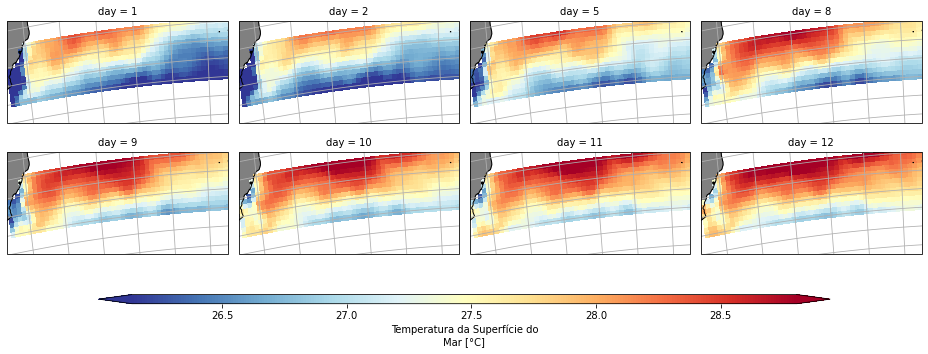

In [395]:
fg = daily_means.sst.plot(
    col="day",
    col_wrap=4,
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.Orthographic(-24, -42)},
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 80,
        "pad": 0.1,
    },
)

for ax in fg.axes.flat:
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-41, -29, -24, -20])
    ax.add_feature(cartopy.feature.LAND,color="gray", edgecolor='black')
    
plt.draw()

In [386]:
aranis_era5.time

<xarray.DataArray 'time' (time: 32)>
array(['2016-03-01T00:00:00.000000000', '2016-03-01T06:00:00.000000000',
       '2016-03-01T12:00:00.000000000', '2016-03-01T18:00:00.000000000',
       '2016-03-02T00:00:00.000000000', '2016-03-02T06:00:00.000000000',
       '2016-03-02T12:00:00.000000000', '2016-03-02T18:00:00.000000000',
       '2016-03-05T00:00:00.000000000', '2016-03-05T06:00:00.000000000',
       '2016-03-05T12:00:00.000000000', '2016-03-05T18:00:00.000000000',
       '2016-03-08T00:00:00.000000000', '2016-03-08T06:00:00.000000000',
       '2016-03-08T12:00:00.000000000', '2016-03-08T18:00:00.000000000',
       '2016-03-09T00:00:00.000000000', '2016-03-09T06:00:00.000000000',
       '2016-03-09T12:00:00.000000000', '2016-03-09T18:00:00.000000000',
       '2016-03-10T00:00:00.000000000', '2016-03-10T06:00:00.000000000',
       '2016-03-10T12:00:00.000000000', '2016-03-10T18:00:00.000000000',
       '2016-03-11T00:00:00.000000000', '2016-03-11T06:00:00.000000000',
       '2016-03-11T12:00:00.000000000', '2016-03-11T18:00:00.000000000',
       '2016-03-12T00:00:00.000000000', '2016-03-12T06:00:00.000000000',
       '2016-03-12T12:00:00.000000000', '2016-03-12T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-03-01 ... 2016-03-12T18:00:00
Attributes:
    long_name:  time

In [259]:
import cartopy

### Variáveis Meteorológicas

In [8]:
# Abrindo os dados
dados_pr_2011 = loadmat('dataset/variaveis_meteo/pr_wtreatm2011.mat')
dados_pr_2016 = loadmat('dataset/variaveis_meteo/pr_wtreatm2016.mat')
dados_hgt_2011 = loadmat('dataset/variaveis_meteo/hgt2011.mat')
dados_hgt_2016 = loadmat('dataset/variaveis_meteo/hgt2016.mat')
dados_prs_2011 = loadmat('dataset/variaveis_meteo/pressfc2011.mat')

In [24]:
# pr11
lat_pr_2011 = dados_pr_2011['latitude'].tolist()
lon_pr_2011 = dados_pr_2011['longitude'].tolist()
pr_2011 = dados_pr_2011['pr_wtr'][0]
pr_2011_time = dados_pr_2011['time'][0]

# pr16
lat_pr_2016 = dados_pr_2016['latitude'].tolist()
lon_pr_2016 = dados_pr_2016['longitude'].tolist()
pr_2016 = dados_pr_2016['pr_wtr'][0]
pr_2016_time = dados_pr_2016['time']


# hgt11
lat_hgt_2011 = dados_hgt_2011['latitude'].tolist()
lon_hgt_2011 = dados_hgt_2011['longitude'].tolist()
hgt_2011 = dados_hgt_2011['hgt'][0]
hgt_2011_time = dados_hgt_2011['time']
# hgt16

lat_hgt_2016 = dados_hgt_2016['latitude'].tolist()
lon_hgt_2016 = dados_hgt_2016['longitude'].tolist()
hgt_2016 = dados_hgt_2016['hgt'][0]
hgt_2016_time = dados_hgt_2016['time']





In [9]:
dados_hgt_2016.keys()

dict_keys(['__header__', '__version__', '__globals__', 'hgt', 'latitude', 'level', 'longitude', 'time'])

array([[1849584],
       [1849608],
       [1849632],
       [1849656],
       [1849680],
       [1849704],
       [1849728],
       [1849752],
       [1849776],
       [1849800],
       [1849824],
       [1849848],
       [1849872],
       [1849896],
       [1849920],
       [1849944],
       [1849968],
       [1849992],
       [1850016],
       [1850040],
       [1850064],
       [1850088],
       [1850112],
       [1850136],
       [1850160],
       [1850184],
       [1850208],
       [1850232],
       [1850256],
       [1850280],
       [1850304],
       [1850328],
       [1850352],
       [1850376],
       [1850400],
       [1850424],
       [1850448],
       [1850472],
       [1850496],
       [1850520],
       [1850544],
       [1850568],
       [1850592],
       [1850616],
       [1850640],
       [1850664],
       [1850688],
       [1850712],
       [1850736],
       [1850760],
       [1850784],
       [1850808],
       [1850832],
       [1850856],
       [1850880],
       [18

TypeError: unsupported type for timedelta days component: numpy.int64

In [103]:
#https://www.codetd.com/en/article/7415135
def datenum_to_datetime(date_num, n_step, resolution):
    
    first_day = np.datetime64('1800-01-01 00:00:00')
    date_time = date_num/24 *  np.timedelta64(n_step, resolution) + first_day
    
    return date_time

In [105]:
new_dates_pr_2011 = list(map(lambda d: datenum_to_datetime(d, 1, 'D'), pr_2011_time))
new_dates_pr_2016 = list(map(lambda d: datenum_to_datetime(d, 1, 'D'), pr_2016_time))
new_dates_hgt_2011 = list(map(lambda d: datenum_to_datetime(d, 1, 'D'), hgt_2011_time))
new_dates_hgt_2016 = list(map(lambda d: datenum_to_datetime(d, 1, 'D'), hgt_2016_time))

In [106]:
new_dates_hgt_2011

[array(['2011-01-01T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-01T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-01T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-01T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-02T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-02T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-02T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-02T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-03T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-03T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-03T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-03T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-04T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-04T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-04T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-04T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-05T00:00:00'], dtype='datetime64[s]'),
 array(['2011-01-05T00:00:00'], dtype='datetime6